### 3D reconstruction from a single image.


In [1]:
# import necessary packages
import sys,os
if (sys.version_info < (3, 0)):
    raise Exception("Please follow the installation instruction on 'https://github.com/chrischoy/3D-R2N2'")

import numpy as np
from PIL import Image

from models import load_model
from lib.solver import Solver
from lib.voxel import voxel2obj
from lib.data_augmentation import preprocess_img

import matplotlib.pyplot as plt
import torch

In [2]:
# load trained weights
TRAINED_WEIGHTS = 'output/ResidualGRUNet/checkpoint.10000.tar'

In [3]:
def load_multi_images(multi_path):
    ims = []
    for i in range(3):
        im = preprocess_img(Image.open(multi_path[i]).resize((127,127)), train=False)
        ims.append([np.array(im).transpose(
            (2, 0, 1)).astype(np.float32)])
        plt.imshow(im)
        plt.show()
    return np.array(ims)

def load_single_image(single_path):
    ims = []
    im = preprocess_img(Image.open(single_path).resize((127,127)), train=False)
    ims.append([np.array(im).transpose(
        (2, 0, 1)).astype(np.float32)])
    plt.imshow(im)
    plt.show()
    return np.array(ims)

def show_image(single_path):
    ims = []
    im = preprocess_img(Image.open(single_path).resize((127,127)), train=False)
    ims.append([np.array(im).astype(np.float32)])
    plt.imshow(im)
    plt.show()

# -----------------------------------------------------------------------------

def reconstruct(path, file_num = 0, do_single = True):

    # load images
    if do_single:
        demo_imgs = load_single_image(path)
    else:
        demo_imgs = load_multi_images(path)
    
    # Use the default network model
    NetClass = load_model('ResidualGRUNet')

    # Define a network and a solver. Solver provides a wrapper for the test function.
    net = NetClass()
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
#    net.cuda()
    net.to(device)
    
    solver = Solver(net)
    solver.load(TRAINED_WEIGHTS)
    
    # Run the network
    voxel_prediction, _ = solver.test_output(demo_imgs)
    
    file_name = path.split('.')[-2].split('_')[-3]
    # convert prediction to obj and save it in the goven path
    pred_file_name = 'results/prediction'+str(file_num)+'.obj'
    
    pred = voxel_prediction[0, 1, :, :, :].cpu().detach().numpy()

    voxel2obj(pred_file_name, pred>0.2)
    
    print('OBJ fine saved')

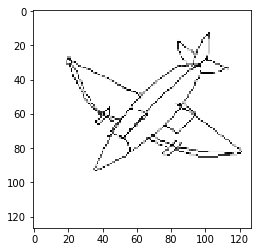

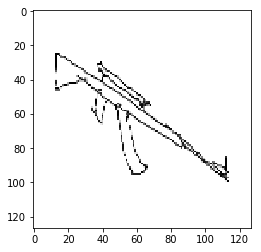

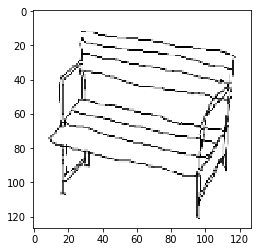

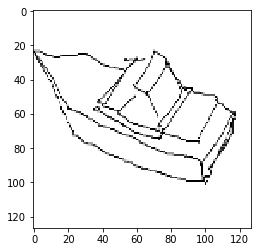

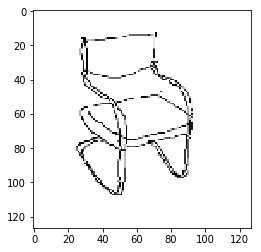

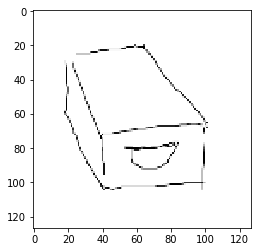

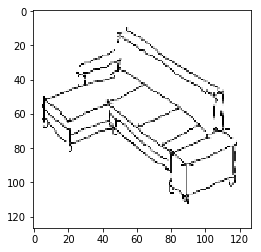

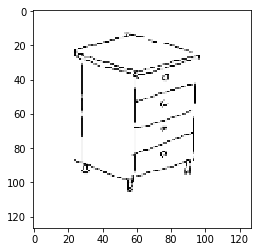

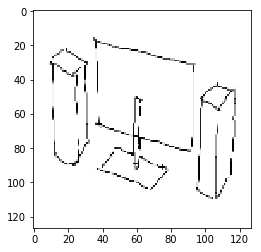

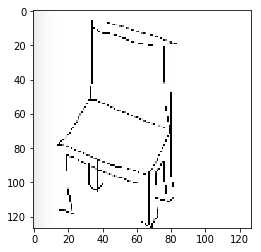

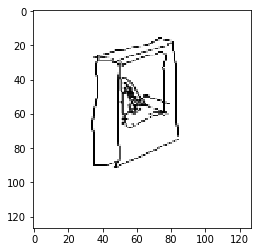

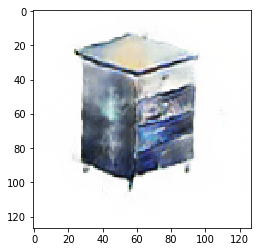


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


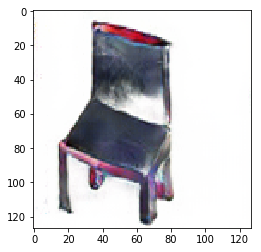


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


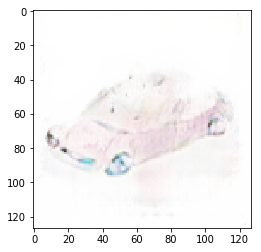


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


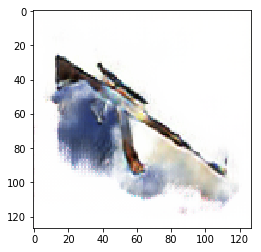


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


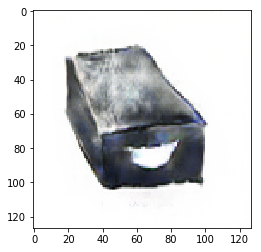


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


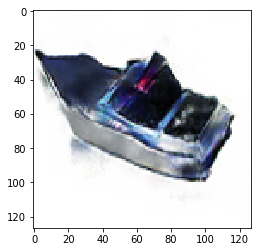


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


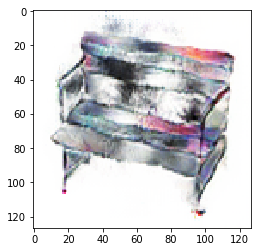


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


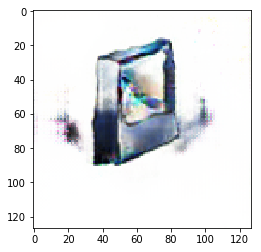


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


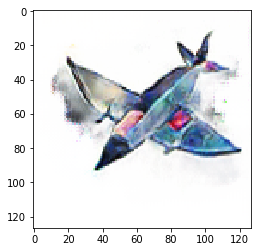


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


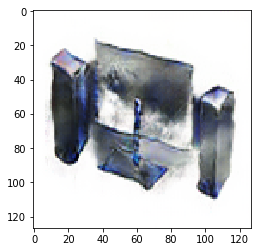


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


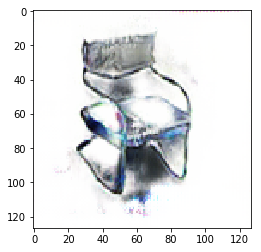


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved


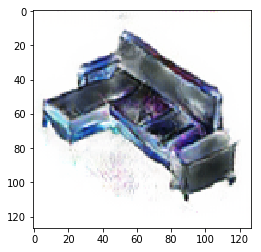


Your Model is "ResidualGRUNet" Initializing

Initializing "Encoder"

Initializing "Decoder"
Set the learning rate to 0.000100.
loading checkpoint from 'output/ResidualGRUNet/checkpoint.10000.tar'
OBJ fine saved
your prediction has been saved as prediction.obj in the root folder.


In [4]:
# 1. put your sketch into dataroot

dataroot = './pix2pix/single_sketch/testB/'
direction = 'BtoA'
model = 'test'
name = 'edges2shoes_pretrained'
dataset_mode = 'single'
norm = 'batch'
netG = 'unet_256'
cmd ="python ./pix2pix/test.py --dataroot "+dataroot+\
          ' --name '+name+' --direction '+direction+' --model '+model+\
          ' --dataset_mode '+dataset_mode+' --norm '+norm+' --netG '+netG
# print(cmd)
for file in os.listdir(dataroot):
    if file.split('.')[-1] in ['png','jpg','jpeg']:
        show_image(dataroot+file)
os.system(cmd)

# 2. get the pixel image and 3D reconstruct it

pixel_folder = './results/'+name+'/test_latest/images/'
paths = os.listdir(pixel_folder)
for i in range(len(paths)):
    if paths[i].split('.')[-2][-1]=='B':
        reconstruct(pixel_folder+paths[i],file_num=i)

# 3. find reconstructed model   
print('your prediction has been saved as prediction.obj in the root folder.')

In [5]:
# define the path of your imgs
# single image path
single_path = 'imgs/0.png'

# multiple images path
multi_path = ['imgs/0.png', 'imgs/1.png', 'imgs/2.png']

#reconstruct(single_path)